In [1]:
import pathlib

In [2]:
img_path = pathlib.Path('img')

In [3]:
img_path = sorted([str(path) for path in img_path.glob('*.jpg')])

In [4]:
img_path

['img/cat-01.jpg',
 'img/cat-02.jpg',
 'img/cat-03.jpg',
 'img/dog-01.jpg',
 'img/dog-02.jpg',
 'img/dog-03.jpg']

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import os 
import PIL

Imagem shape: (900, 1200, 3)
Imagem shape: (900, 1200, 3)
Imagem shape: (900, 742, 3)
Imagem shape: (800, 1200, 3)
Imagem shape: (800, 1200, 3)
Imagem shape: (900, 1200, 3)


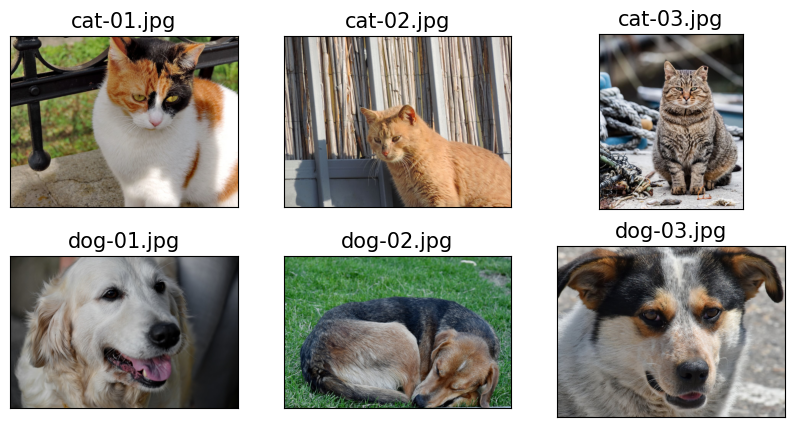

In [6]:
fig = plt.figure(figsize=(10,5))
for i, file in enumerate(img_path):
    img = PIL.Image.open(file)
    print('Imagem shape:' ,np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.show()


In [7]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in img_path]

In [8]:
labels

[0, 0, 0, 1, 1, 1]

In [9]:
from torch.utils.data import Dataset

In [10]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels    = labels
    def __getitem__(self, index):
        file  = self.file_list[index]
        label = self.labels[index]
        return file, label
    def __len__(self):
        return len(self.labels)

In [11]:
image_dataset = ImageDataset(img_path, labels)

In [12]:
for file, label in image_dataset:
    print(file, label)

img/cat-01.jpg 0
img/cat-02.jpg 0
img/cat-03.jpg 0
img/dog-01.jpg 1
img/dog-02.jpg 1
img/dog-03.jpg 1


In [13]:
import torchvision.transforms as tr

In [14]:
transform = tr.Compose(
    [tr.ToTensor(),tr.Resize((80, 120))]
    )
transform

Compose(
    ToTensor()
    Resize(size=(80, 120), interpolation=bilinear, max_size=None, antialias=True)
)

In [15]:
import PIL


class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform):
        self.file_list = file_list
        self.labels    = labels
        self.transform = transform

    def __getitem__(self, index):
        img = PIL.Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)

In [19]:
image_dataset = ImageDataset(img_path, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


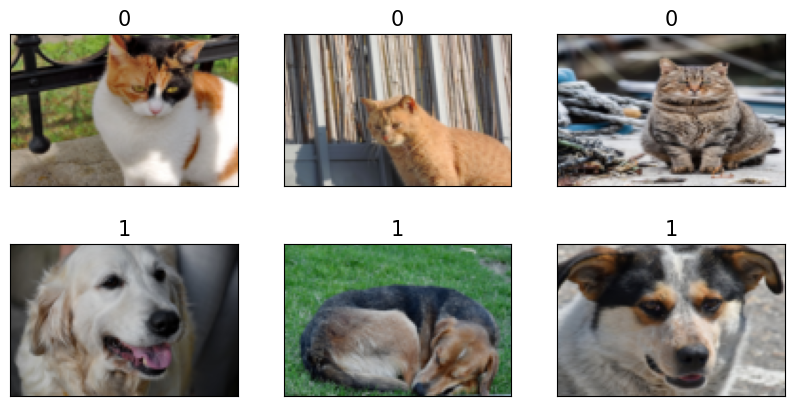

In [17]:
fig = plt.figure(figsize=(10,5))
for i,example in enumerate(image_dataset):
    img = PIL.Image.open(file)
    ax = fig.add_subplot(2, 3, i+1)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose(1,2,0))
    ax.set_title(example[1], size=15)
plt.show()